# Time Series Analysis - Component Decomposition

[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Nov 29, 2020

In this notebook, we will first create a time series and then decompose it into major components, which are helpful in understanding the basic structure of the time series. Such a decomposition is also helpful in building forecasting models.



In [1]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### Major Components of a Time Series

1. **Level** is the baseline value of a time series (mean value).
2. **Cycle** is rises and falls that are not of fixed period
3. **Trend** is the smooth long term tendency (level and cycle are usually treated as part of the trend).
4. **Seasonality** or Periodicity is the repeating patterns
5. **Noise** is the variability of the data





### A Time Series with Known Components

Let's create a time series with the following function:

$X_t = X(t)\approx2t+t\cdot sin(t^{2})+3\sin \left(20t\right)+2\,random\left(0,1\right)$

$trend = 2t + t\cdot sin(t^{2})$

$seasonality = 3\sin \left(20t\right)$

$noise = 2\,random\left(0,1\right)$


In [2]:
t=np.linspace(-1, 5, num=500)
f_trend=2.0*t + t*np.sin(t**2)
f_seasonality=3*np.sin(20*t)
f_noise=2*np.random.randn(len(t))
f_final = f_trend + f_seasonality + f_noise
df= pd.DataFrame({"t": t,
                  "X": f_final,
                  "Trend" : f_trend,
                  "Seasonality": f_seasonality,
                  "Noise": f_noise
                  })

In [3]:
df

,t,X,Trend,Seasonality,Noise
0,-1.000000,-3.697592,-2.841471,-2.738836,1.882715
1,-0.987976,-4.663260,-2.794309,-2.368443,0.499493
2,-0.975952,-3.555057,-2.747165,-1.861740,1.053848
3,-0.963928,-2.730642,-2.700073,-1.247888,1.217319
4,-0.951904,-4.137220,-2.653067,-0.562217,-0.921936
...,...,...,...,...,...
495,4.951904,4.040566,7.061384,-2.990900,-0.029918
496,4.963928,7.296686,7.582241,-2.849223,2.563668
497,4.975952,5.624076,8.140264,-2.543565,0.027378
498,4.987976,6.088946,8.728200,-2.091518,-0.547737


<AxesSubplot:>

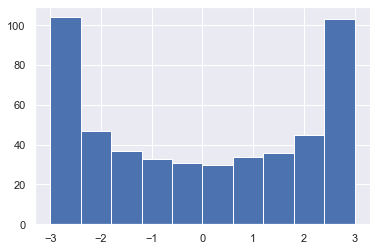

In [4]:
df["Seasonality"].hist()

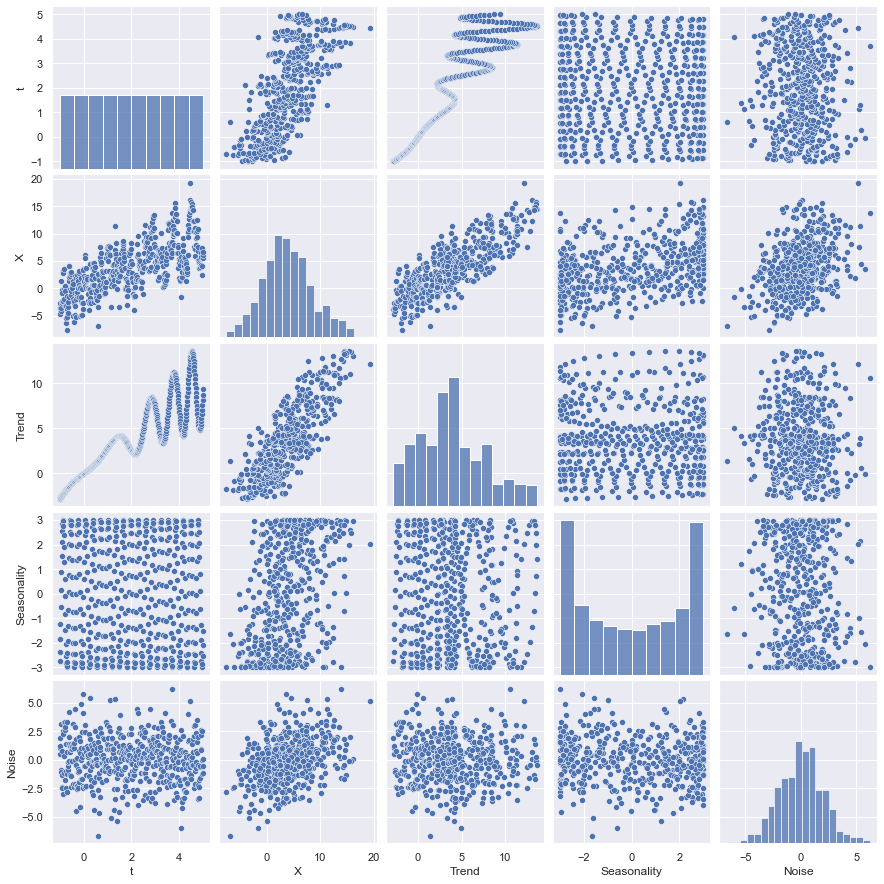

In [5]:
# pairplot a very powerful plotting tool to study the relationship between variables.
# this pair plot contains a lot of information about this time series. 
# You can uncomment the following statement and run to check out the pairplot 
# of different components.

sns.pairplot(data=df)

Let's plot out the time series and the "components" we used to create it.

<AxesSubplot:>

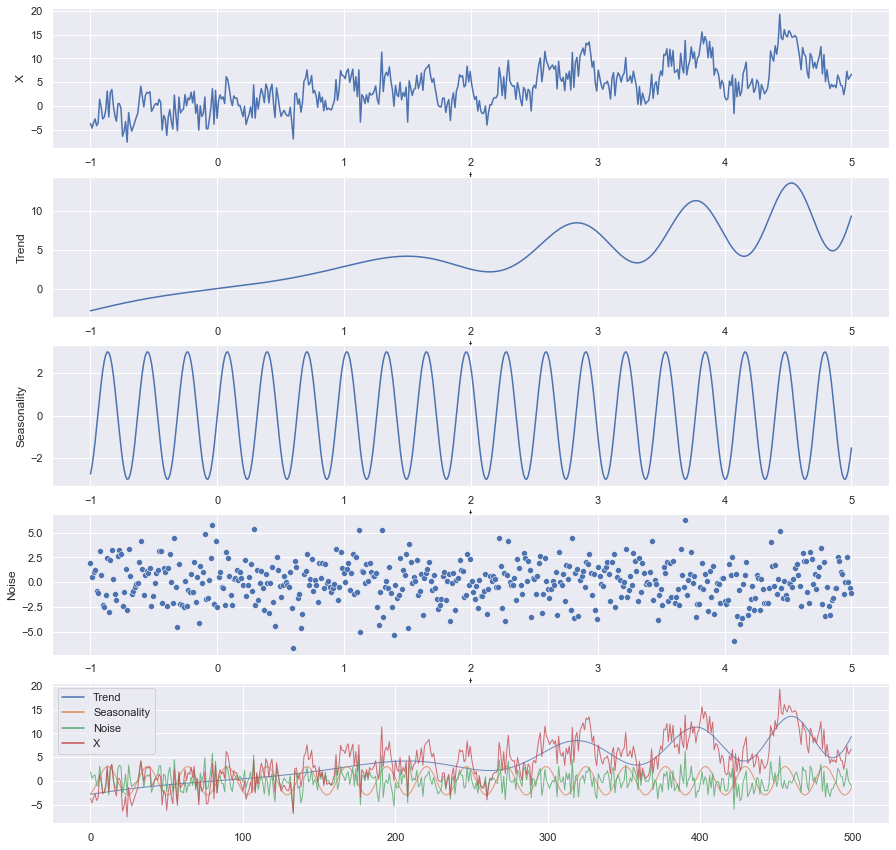

In [6]:
fig, axes = plt.subplots(5,1, figsize=(15, 15))
sns.lineplot(x='t', y='X', data=df, ax=axes[0])
sns.lineplot(x='t', y='Trend', data=df, ax=axes[1])
sns.lineplot(x='t', y='Seasonality', data=df, ax=axes[2])
sns.scatterplot(x='t', y='Noise', data=df, ax=axes[3])

sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df[["Trend", "Seasonality", "Noise", "X"]], legend="full",lw=1, dashes=False, alpha=0.8, ax=axes[4])
# sns_plot.get_figure().savefig("components.png")

### Decomposition with statsmodels Module

The seasonal_decompose() method comes with the statsmodels module takes 6 parameters. The model type parameter can either be **additive** or **multiplicative**. If the seasonality’s amplitude is independent of the mean of the time series then the additive model should be used, otherise use the multiplicative model.

The parameter `freq` is replace with `period` in the latest version of statsmodels. Both of them indicates the periodic property of your time series, it is usually recommended to try out different frequencies or periods to explore a good range for real world data sets. In this example, we choose `freq=26`, which is actually the frequency of the seasonality component we used to construct the time series. You can try different frequencies to see how the decomposed components will look different.


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['X'], freq=26, model='additive')

<ipython-input-7-9d56abeb083e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['X'], freq=26, model='additive')


The results could be directly plotted with the plot method.

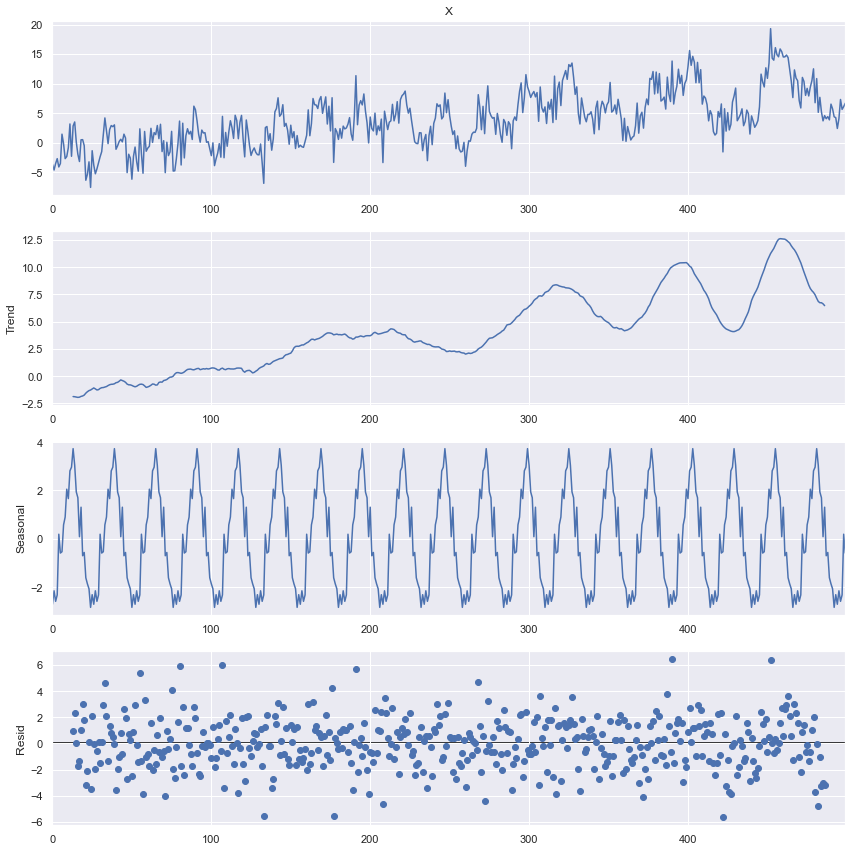

In [8]:
# enlarge the figure to make it easy to see the details.
sns.set(rc={'figure.figsize':(12,12)})
result.plot();

Lets' try to compare the component decomposed from the time series against the component we used to construct the time series.

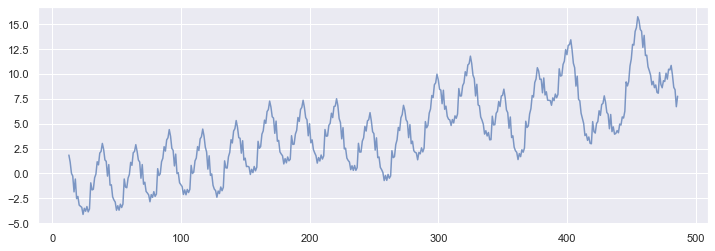

In [9]:
plt.figure(figsize=(12,4))
#plt.plot(f_seasonality)
#plt.plot(df["X"])
plt.plot(result.seasonal + result.trend, alpha=0.7)

Question: What do you observe for the trend line? Are we able to do a better job to decompose the trend?

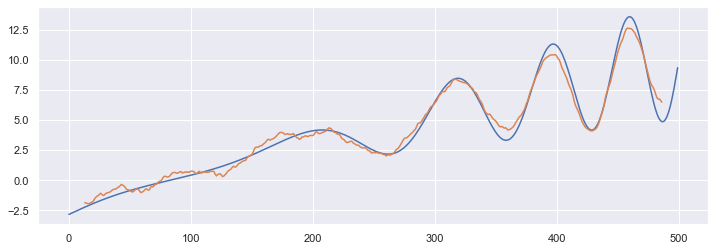

In [10]:
plt.figure(figsize=(12,4))
plt.plot(f_trend)
plt.plot(result.trend)

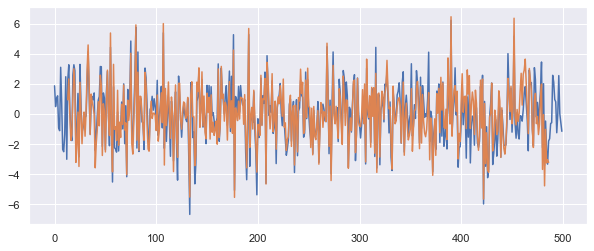

In [11]:
plt.figure(figsize=(10,4))
plt.plot(f_noise)
plt.plot(result.resid)

In [12]:
np.mean(f_noise)

0.020915911729235327

In [13]:
np.mean(result.resid)

-0.003977140030015832

In [14]:
np.abs(np.std(f_noise)-np.std(result.resid))/np.std(f_noise)

0.029535426171960682

It is clear that the decomposed residual falls into a normal distribution, which matches with what was used to generate the time series.

(array([  5.,  21.,  40.,  91., 117., 111.,  61.,  19.,   3.,   6.]),
 array([-5.65483383, -4.44134528, -3.22785673, -2.01436818, -0.80087963,
         0.41260892,  1.62609747,  2.83958602,  4.05307457,  5.26656312,
         6.48005167]),
 <BarContainer object of 10 artists>)

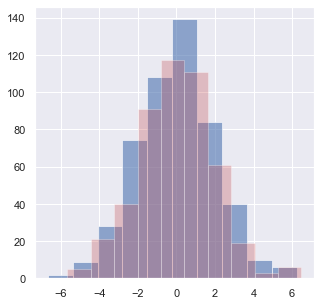

In [15]:
plt.figure(figsize=(5,5))
plt.hist(f_noise, alpha=0.6)
plt.hist(result.resid, alpha=0.3, color="r")

### Detrend a Time Series
Detrend a time series will make it stationary, which is usually a required condition for constructing time series forecasting models. The resulting series will contain seasonality and noise only.

In [16]:
df["detrend"] = df["X"] - result.trend
df["stationary"] = df["X"] - result.trend - result.seasonal

<AxesSubplot:>

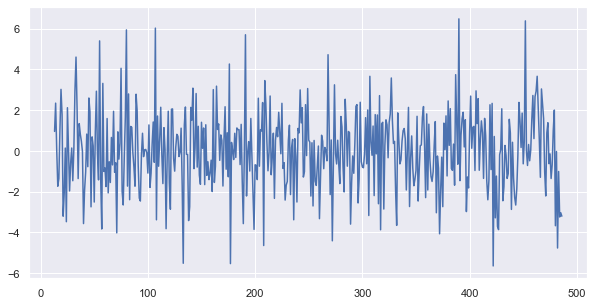

In [17]:
df["stationary"].plot(figsize=(10,5))